<h3>1. (a) Loading Red Wine data set...</h3>


In [6]:
import urllib
urllib.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', 'winequality-red.csv')
import numpy as np
with open('winequality-red.csv') as f:
    lines = (line for line in f)
    data = np.loadtxt(lines, delimiter=';', skiprows=1)
q = data[:,11]

<h3>1. (b) Loading White Wine data set...</h3>

In [7]:
urllib.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', 'winequality-white.csv')
import numpy as np
with open('winequality-white.csv') as fw:
    lines_white = (line for line in fw)
    data_white = np.loadtxt(lines_white, delimiter=';', skiprows=1)
q_white = data_white[:,11]

<h3>2. (a) Plotting Red Wine Quality distribution...</h3>

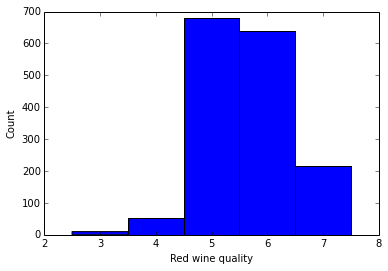

In [8]:
%matplotlib inline
import pylab as plt
plt.hist(q, bins=np.arange(q.min(), q.max()+1), align='left')
plt.xlabel('Red wine quality')
plt.ylabel('Count')

<h3>2. (b) Plotting White Wine Quality distribution...</h3>

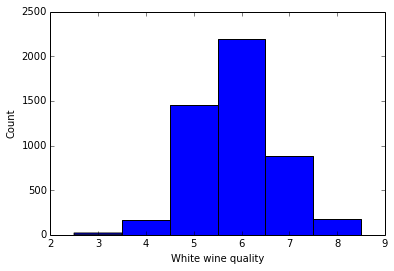

In [9]:
%matplotlib inline
import pylab as plt
plt.hist(q_white, bins=np.arange(q_white.min(), q_white.max()+1), align='left')
plt.xlabel('White wine quality')
plt.ylabel('Count')

<h3>3. Comments on these distributions</h3>

<h3>4. Linear regression</h3>

In [12]:
from numpy.linalg import inv

def fitRegressionModelAndGetSquareError(showPlot, order):
    N = data.shape[0] #get tupple (numRows, numCols)
    np.random.shuffle(data) # randomly shuffle the data

    # split the data in 70% train and 30% test
    train = data[:int(N*0.7)]
    test = data[int(N*0.7):]
    
    X_train = train[:,:11]
    X_train = X_train **(order)
    X_train = np.c_[np.ones(train.shape[0]), X_train] # append 1s as first column
    q_train = train[:,11]
    # data is now splitted into train and test
    
    XtX = np.dot(X_train.T, X_train) 
    XtXI = inv(XtX)
    XtXIXt = np.dot(XtXI, X_train.T)
    # Fitting the regression model to the training data.
    # Depending on the order parameter, we can fit linear (order = 1), square or higher order
    # regression models.
    wbar = np.dot(XtXIXt, q_train)
    # Optimal values for the wbar are now found. 
    # For these values we are minimizing the Loss agianst the train data

    X_test = test[:,:11]
    X_test = X_test **(order)
    X_test = np.c_[np.ones(test.shape[0]), X_test]
    q_test = test[:,11]
    f_test = np.dot(X_test, wbar) # getting the prediction values
    
    meanSquareError = ((q_test-f_test)**2).mean()
    
    # Part 4(c) Scatter plot showing predictions vs true values
    if showPlot:
        print "Linear regression with minimised square loss. Mean Square Error =", meanSquareError
        plt.scatter(f_test,q_test, color='blue')
        plt.xlabel('Red wine test data quality')
        plt.ylabel('Red wine predicted quality')
    return meanSquareError

<h3>4 (a), (b) and (c) The function above splits the data in 70% train and 30% test. Fits the linear
pregression to the training data and prints the Mean Square Error</h3>

Linear regression with minimised square loss. Mean Square Error = 0.402712537505


0.40271253750460317

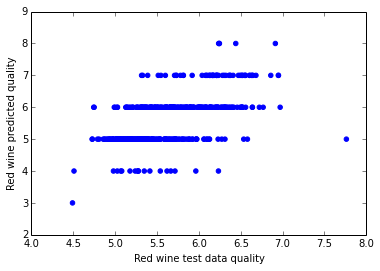

In [13]:
fitRegressionModelAndGetSquareError(True,1)

<h3>4 (d) Benchmark Suggestion</h3>
<p></p>

<h3>4 (e) Benchmark Code</h3>

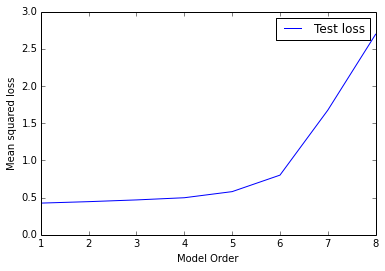

In [16]:
max_order = 7
runs = 100
error_runs = np.zeros((max_order+1,100))
errors = []
orders = [i+1 for i in range(max_order+1)]

for k in range(max_order+1):
    for i in range(100):
        err = fitRegressionModelAndGetSquareError(False, k+1)
        error_runs[k,i] = err

plt.figure()
plt.plot(np.array(orders),error_runs.mean(axis=1),'b-',label="Test loss")
plt.legend()
plt.xlabel('Model Order')
plt.ylabel('Mean squared loss')    

<h3>4 (f) Linear Regression Perforamnce compared to the benchmark</h3>

<h3>Regularised regression - The description below is not my own work and is taken from an opensource notebook.</h3>
<p>Our original squared loss function in matrix/vector notation is:
$$ L = \frac{1}{N}\sum_{n=1}^N (\mathbf{t} - \mathbf{X}\mathbf{w})^T(\mathbf{t} - \mathbf{X}\mathbf{w}) $$
Here's another loss function:
$$ L = \lambda \mathbf{w}^T\mathbf{w} + \frac{1}{N}\sum_{n=1}^N (\mathbf{t} - \mathbf{X}\mathbf{w})^T(\mathbf{t} - \mathbf{X}\mathbf{w}) $$
Recall that we're minimising this function and so (if $\lambda>0$) this additional term will penalise large positive and negative values in $\mathbf{w}$. $\lambda$ controls how much influence this new term has over the original squared error term.</p>

<p>Differentiating this with respect to $\mathbf{w}$ and then setting to zero (this is a good exercise to do) results in:
$$ (\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})\mathbf{w} = \mathbf{X}^T\mathbf{t} $$
where $\mathbf{I}$ is a square matrix with ones on the diagonal and zeros elsewhere (the identity matrix).</p>

<p>To demonstrate the effect of this additional term, we will generate some synthetic data by using a quadratic function and assing some random (normal / Gaussian) noise.</p>

<h3>5 (a) Implementing Regularised least square and plotting lampda parameter agains the error.</h3>

lampda 0 Mean Square Error = 0.20685173421
lampda 0.01 Mean Square Error = 0.215946013849
lampda 0.02 Mean Square Error = 0.219281926295
lampda 0.04 Mean Square Error = 0.224066806976
lampda 0.08 Mean Square Error = 0.229701862963
lampda 0.16 Mean Square Error = 0.234752649287
lampda 0.32 Mean Square Error = 0.238400456533
lampda 0.64 Mean Square Error = 0.241198991574
lampda 1.28 Mean Square Error = 0.245087071498


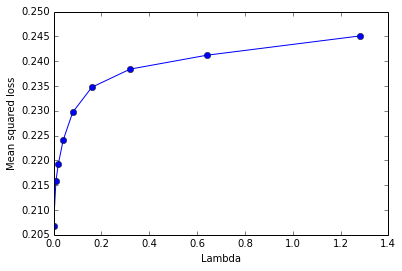

In [18]:
import pylab as plt
from numpy.linalg import inv

#np.random.shuffle(data)
N = data.shape[0] #get tupple (numRows, numCols)

train = data[:int(N*0.7)]
test = data[int(N*0.7):]
X_train = train[:,:11]
X_train = np.c_[np.ones(train.shape[0]), X_train] # append 1s as first column
q_train = train[:,11]

X_test = test[:,:11]
X_test = np.c_[np.ones(test.shape[0]), X_test]
q_test = test[:,11]

lambs = [0,0.01,0.02,0.04,0.08,0.16,0.32,0.64, 1.28]
errors = []
for lamb in lambs:
    XtX = np.dot(X_train.T, X_train)
    XtXlam = XtX + X_train.shape[0]*lamb*np.identity(12)
    XtXlamI = inv(XtXlam)
    XtXIXt = np.dot(XtXlamI, X_train.T)
    w = np.dot(XtXIXt, q_train)
    
    f_test = np.dot(X_test,w)
    meanSquareError = ((q_test-f_test)**2).mean()/2.0
    errors += [meanSquareError]
    print "lampda", lamb, "Mean Square Error =", meanSquareError

plt.legend()
plt.xlabel('Lambda')
plt.ylabel('Mean squared loss')
plt.plot(lambs, errors, '-o')

<p>As $\lambda$ increases, high values in $\mathbf{w}$ are more heavily penalised which leads to *simpler* functions. Why do lower values correspond to simpler functions?</p>
<p>Firstly, what does *simpler* mean?</p>
<p>I would argue that simpler functions have smaller derivatives (first, second, etc) as they typically change more slowly. In our polynomials, the derivatives are dependent on the values of $\mathbf{w}$. In particular our polynomial is:
$$ t = \sum_{d=0}^D w_d x^d $$
and the first derivative is:
$$ \frac{dt}{dx} = \sum_{d=1}^D dw_d x^{d-1} $$
and second is:
$$ \frac{d^2t}{dx^2} = \sum_{d=2}^D d(d-1)w_d x^{d-2} $$
which in both cases increases with increasing values of $w_d$. So penalising high (positive and negative) values decreases (in general) the gradients (and gradients of gradients, etc).</p> 

<h3>5 (b) Why this is not a good way to determine the value of lampda</h3>
<p>TODO</p>

<h3>5 (c) Implementation of 10-fold Cross Validation</h3>

Min cv_loss error is at lampda = 0. The error is = 0.219415577068
Min train_loss error is at lampda = 0. The error is = 0.210224536175
Min ind_loss error is at lampda = 0. The error is = 0.207267188706


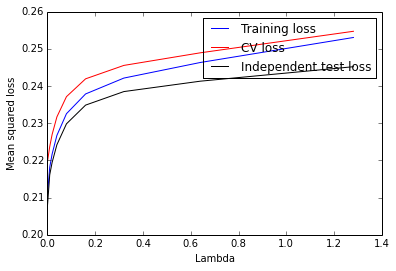

In [25]:
N = train.shape[0]
K = 10
sizes = np.tile(np.floor(N/10),(1,K))
sizes[-1] = sizes[-1] + N - sizes.sum()
c_sizes = np.hstack((0,np.cumsum(sizes)))
X = np.copy(train[:,:11])
X = np.c_[np.ones(train.shape[0]), X]
t = np.copy(train[:,11])
X_test = np.copy(test[:,:11])
X_test = np.c_[np.ones(test.shape[0]), X_test]
t_test = np.copy(test[:,11])
lambs = [0,0.01,0.02,0.04,0.08,0.16,0.32,0.64, 1.28]
cv_loss = np.zeros((K, len(lambs)))
ind_loss = np.zeros((K, len(lambs)))
train_loss = np.zeros((K, len(lambs)))

k = 0
for lamb in lambs:
    for fold in range(K):
        X_fold = X[c_sizes[fold]:c_sizes[fold+1],:]
        X_train = np.delete(X,np.arange(c_sizes[fold],c_sizes[fold+1],1),0)

        t_fold = t[c_sizes[fold]:c_sizes[fold+1]]
        t_train = np.delete(t,np.arange(c_sizes[fold],c_sizes[fold+1],1),0)
        XtX = np.dot(X_train.T, X_train)
        XtXlam = XtX + X_train.shape[0]*lamb*np.identity(12)
        XtXlamI = inv(XtXlam)
        XtXIXt = np.dot(XtXlamI, X_train.T)
        w = np.dot(XtXIXt, t_train)

        fold_pred = np.dot(X_fold,w)
        cv_loss[fold,k] = ((fold_pred - t_fold)**2).mean()/2.0
        ind_pred = np.dot(X_test,w)
        ind_loss[fold,k] = ((ind_pred - t_test)**2).mean()/2.0
        train_pred = np.dot(X_train,w)
        train_loss[fold,k] = ((train_pred - t_train)**2).mean()/2.0

    k += 1

print "Min cv_loss error is at lampda = 0. The error is =", cv_loss.mean(axis=0)[0]
print "Min train_loss error is at lampda = 0. The error is =", train_loss.mean(axis=0)[0]
print "Min ind_loss error is at lampda = 0. The error is =", ind_loss.mean(axis=0)[0]
plt.figure()
plt.plot(lambs,train_loss.mean(axis=0),'b-',label="Training loss")
plt.plot(lambs,cv_loss.mean(axis=0),'r-',label="CV loss")
plt.plot(lambs,ind_loss.mean(axis=0),'k',label="Independent test loss")
plt.legend()
plt.xlabel('Lambda')
plt.ylabel('Mean squared loss')

<h3>5 (d) Compare the performance with the standard linear regression case.</h3>

<p>TODO<\p>

<h3>6 Classification.</h3>
<h4>6 (a) Limitation of using regression<\h4> 
<p>TODO<\p>
<h4>6 (b) Positive and negative features of KNN classifier with respect to our data<\h4> 
<p>TODO<\p>
<h4>6 (c) Data pre-processing<\h4> 
<p>TODO<\p>

<h3>6 (d) Implementing KNN classifier</h3>

In [ ]:
import scipy.spatial.distance as ssd

def read_data():
    #read in red wine data
    urllib.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', 'winequality-red.csv')
    with open('winequality-red.csv') as f:
        lines = (line for line in f)
        data = np.loadtxt(lines, delimiter=';', skiprows=1)
    return data

def knn(k, X_train, X_test, q_train):
    """ k-nearest neighbors """
 
    # initialize list to store predicted class
    pred_class = []
    # for each instance in data testing,
    # calculate distance in respect to data training
    for ii, di in enumerate(X_test):
        distances = []  # initialize list to store distance
        for ij, dj in enumerate(X_train):
            # calculate distances
            distances.append((calc_dist(di,dj), ij))
        # k-neighbors
        k_nn = sorted(distances)[:k]
        # predict the class for the instance
        pred_class.append(classify(k_nn, q_train))
 
    # return prediction class
    return pred_class
 
def calc_dist(di,dj):
    """ Distance calculation for every
        distance functions in use"""
    return ssd.euclidean(di,dj) # built-in Euclidean fn
 
def evaluate(result):
    """ Evaluate the prediction class"""
 
    # create eval result array to store evaluation result
    eval_result = np.zeros(2,int)
    for x in result:
        # increment the correct prediction by 1
        if x == 0:
            eval_result[0] += 1
        # increment the wrong prediction by 1
        else:
            eval_result[1] += 1
    # return evaluation result
    return eval_result

def classify(k_nn, q_train):
    """ Classify instance data test into class"""
 
    qlabel = []
    for dist, idx in k_nn:
        # retrieve label class and store into qlabel
        qlabel.append(q_train[idx])
 
    # return prediction class
    return np.argmax(np.bincount(qlabel))
 
def main():
    """ k-nearest neighbors classifier """
    # read dataset of red wine
    data = read_data()
    N = data.shape[0] #get tupple (numRows, numCols)
    #np.random.shuffle(data)
  
    Nfolds = 10
    sizes = np.tile(np.floor(N/10),(1,Nfolds))
    sizes[-1] = sizes[-1] + N - sizes.sum()
    c_sizes = np.hstack((0,np.cumsum(sizes)))
    X = np.copy(data[:,:11])# change to data here if you dont want to run the cv on independent test data
    t = np.copy(data[:,11])
    
    # initialize K
    K = [1,3,7,11,19]
    cv_loss = np.zeros((Nfolds, len(K)))
    
    for i in range(len(K)):
        for fold in range(Nfolds):
            X_fold = X[c_sizes[fold]:c_sizes[fold+1],:]
            X_train = np.delete(X,np.arange(c_sizes[fold],c_sizes[fold+1],1),0)

            t_fold = t[c_sizes[fold]:c_sizes[fold+1]]
            t_train = np.delete(t,np.arange(c_sizes[fold],c_sizes[fold+1],1),0)
            
            #print "k-NN classification results for red wine data set:"
            #print
            #print "    Number of correct / wrong classified test records"
            #print "k  | Euclidean dist |"
    
            # predict the data test into class
            pred_class = knn(K[i], X_train, X_fold, t_train)
            # evaluate the predicted result
            eval_result = evaluate(pred_class-t_fold)
            # assign the evaluated result into classification result

            # print the classification result into the screen
            # print K[i], " |     ", results[0], "/", results[1]
            cv_loss[fold,i] = float(eval_result[1])/float(eval_result[0]+eval_result[1])
        print "current K,",K[i]
    
    plt.plot(K,cv_loss.mean(axis=0),'r-',label="CV results")
    plt.legend()
    plt.xlabel('K')
    plt.ylabel('Percent wrong classifications')

main()

(1599, 12)
current K, 1
current K, 3
current K, 7
current K,

<h3>6 (e) Display the confusion matrix</h3>

<h3>6 (f) Discuss the performance of KNN</h3>